## NLP

yapilandirilmis veri: satir ve sutunlardan olusmasi (excel, csv ...) 
- NLP sadece ham text uzerinden anlam ve insight cikartabiliyor
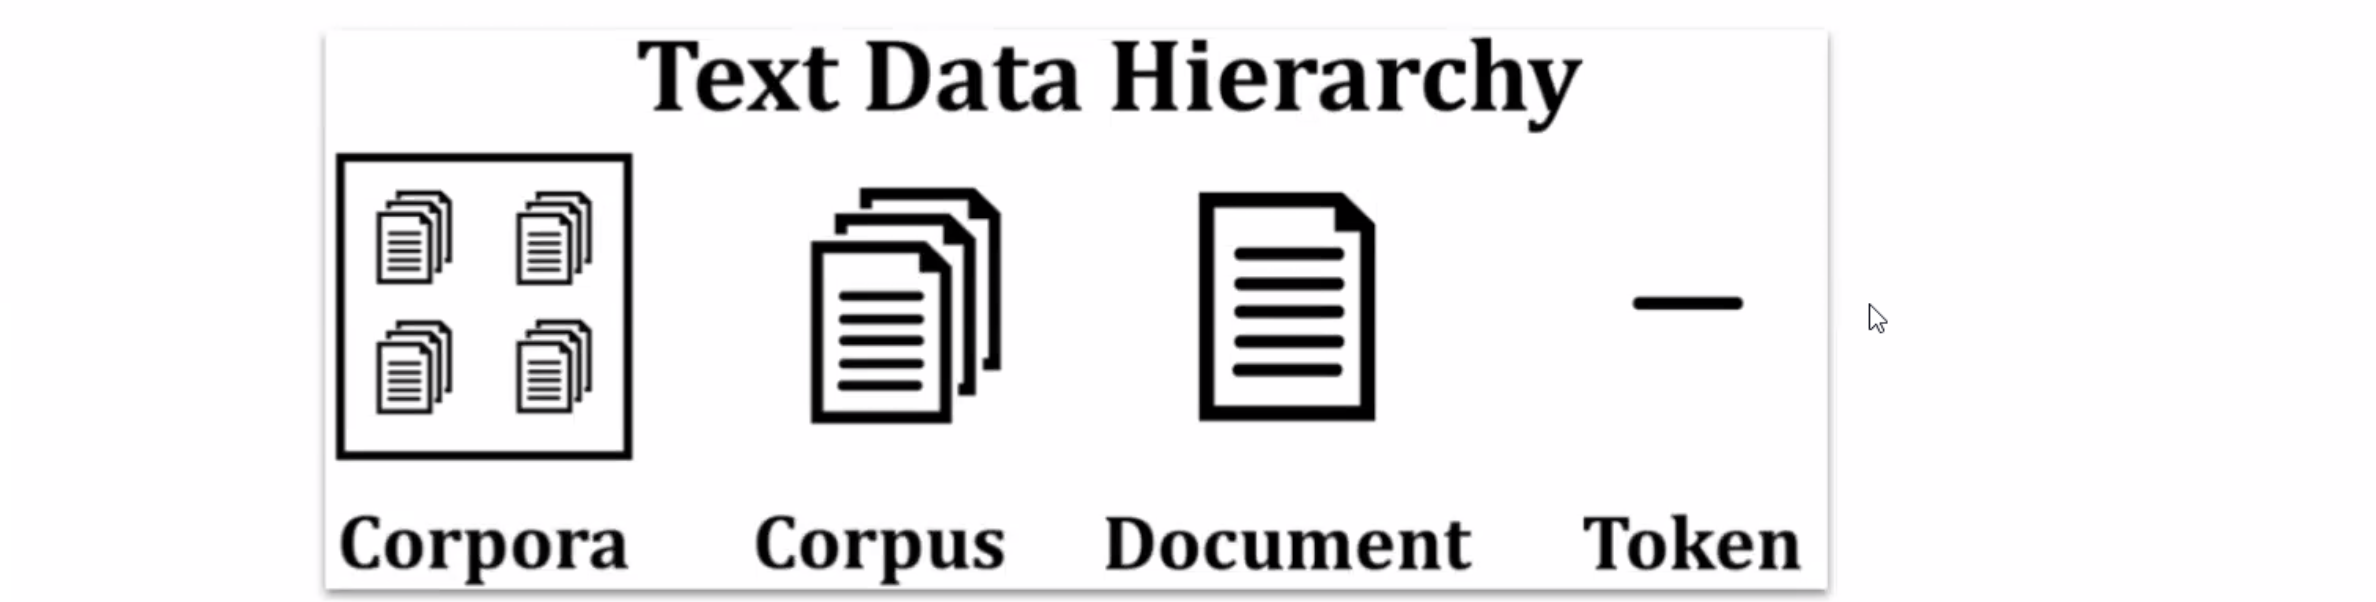
|Terim     |Info     |
| :---      | :---     |
| Corpora   |: Database. datasetinin oldugu birim, birden fazla corpusun birarada bulundugu kisim|
| Corpus    |: Dataseti'nin ismi |
| Document  |: Dataset icindeki satirlar(bir satir, 1-2 kelime, 1-2 kitap vs.. | 
| Token/tokenization     |: Anlamlandirilabilecek halde kucuk parcalara bolunmesi\ sayisal hale getirilip modele verilmesi | 

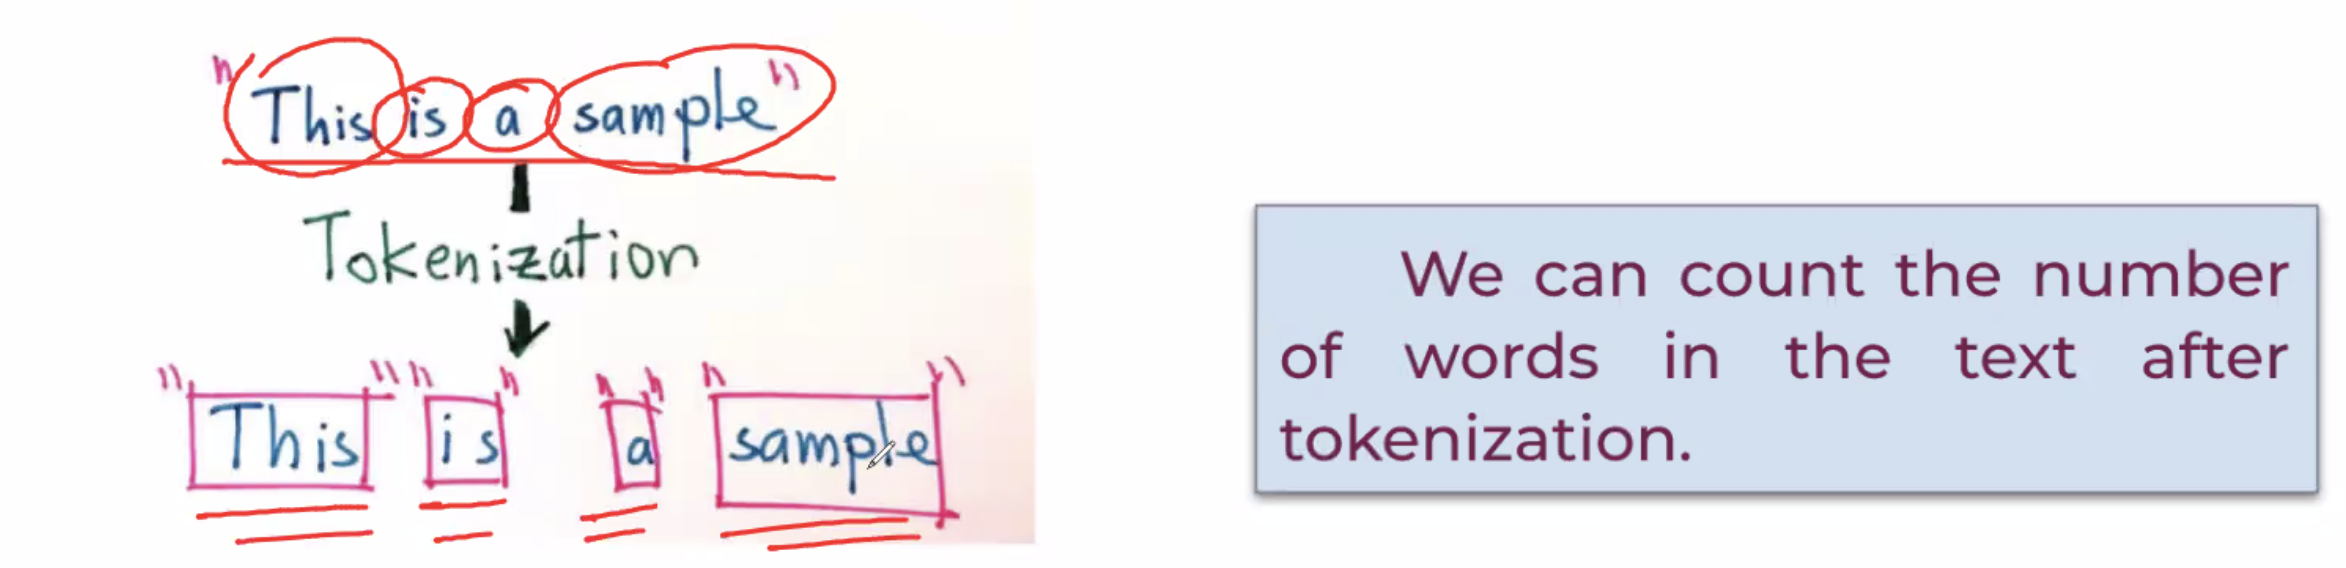

**Data cleaning** (machine learning icin onemli, sonuca dogrudan etkili. Deep learning icin bu kadar etkili degil ) 
- Token/tokenization :Anlamlandirilabilecek halde kucuk parcalara bolunmesi\ sayisal hale getirilip modele verilmesi | 
1. -->  tokenlere ayir 
2. --> kucuk harf ile goster 
3. --> remove punctuation : sayisal ve ozel karakterlerin temizlenmesi
4. --> removing stopwords: olumsuzlari kaldirmamak gerekiyor
5. --> stemming& lemmatization: tokenlerin kokenine inme
- lemmatization: sozlukte anlami var mi yok mu ona da bakar
- stemming : kelimenin en kokune iniyor, koyun--> koy secebilir (deneme yanilma ile bakip karar verebiliriz, lemmatization daha tercih edilesi)
- normalisation: kullanim alanini daraltip, tek bir kokene indiriyor 

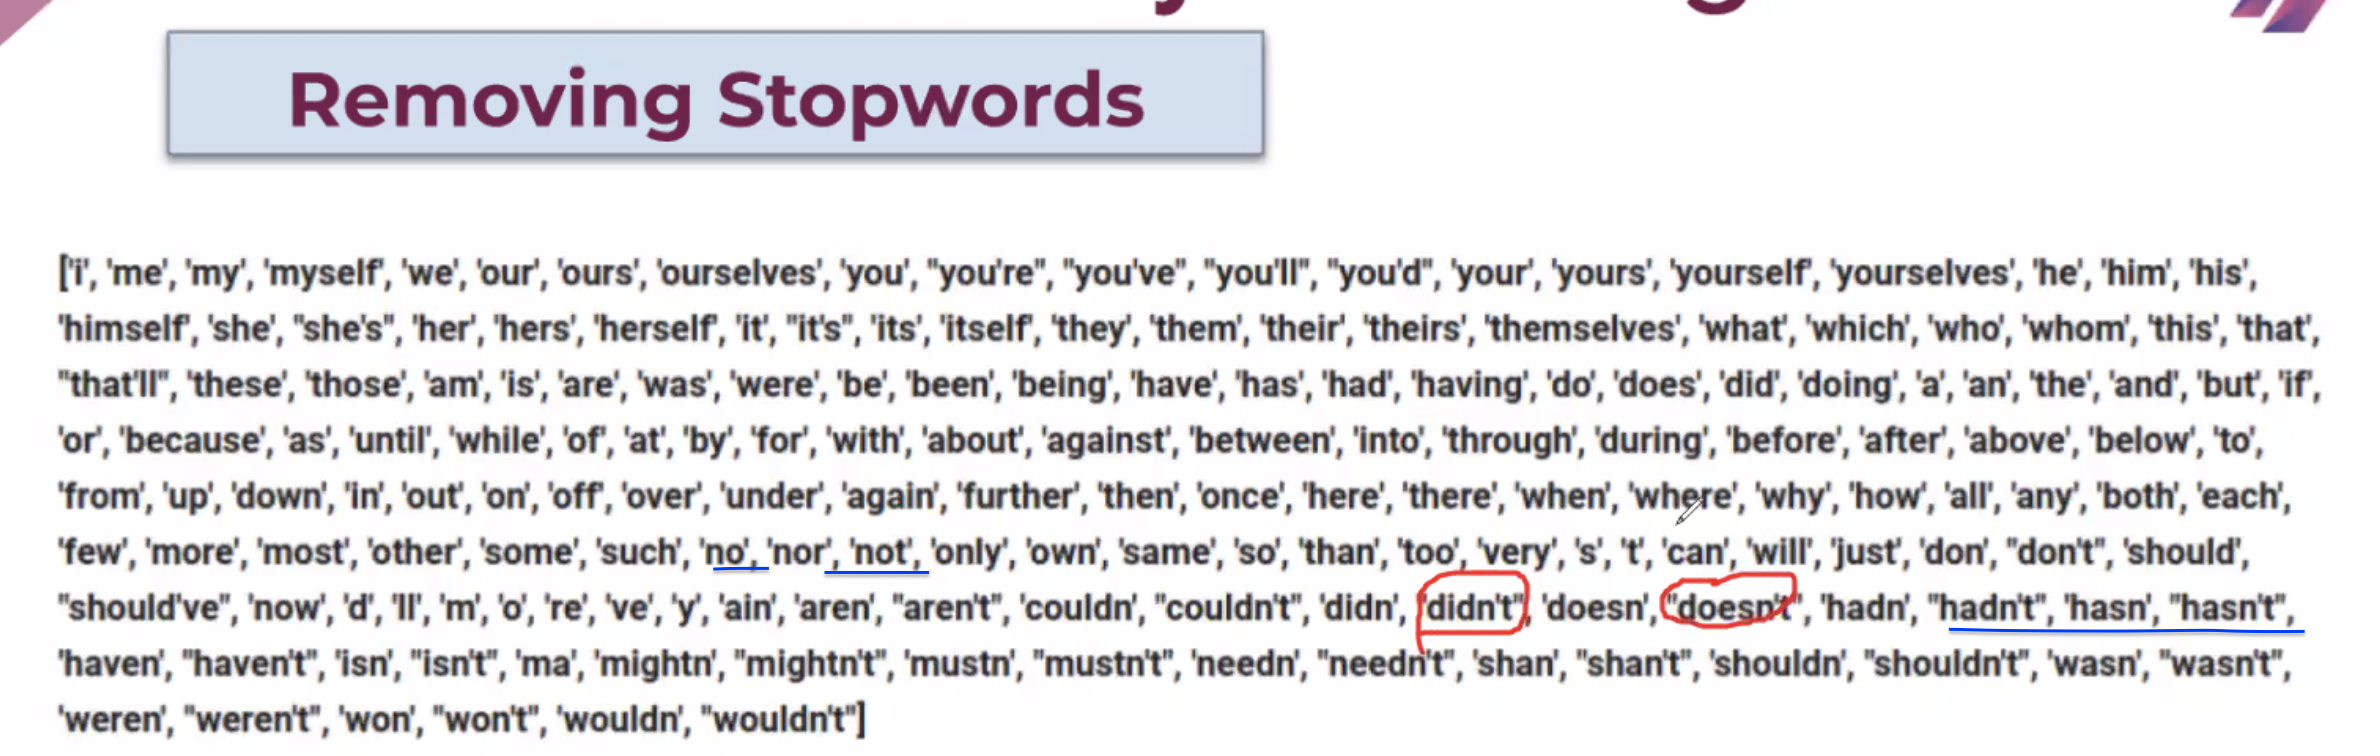
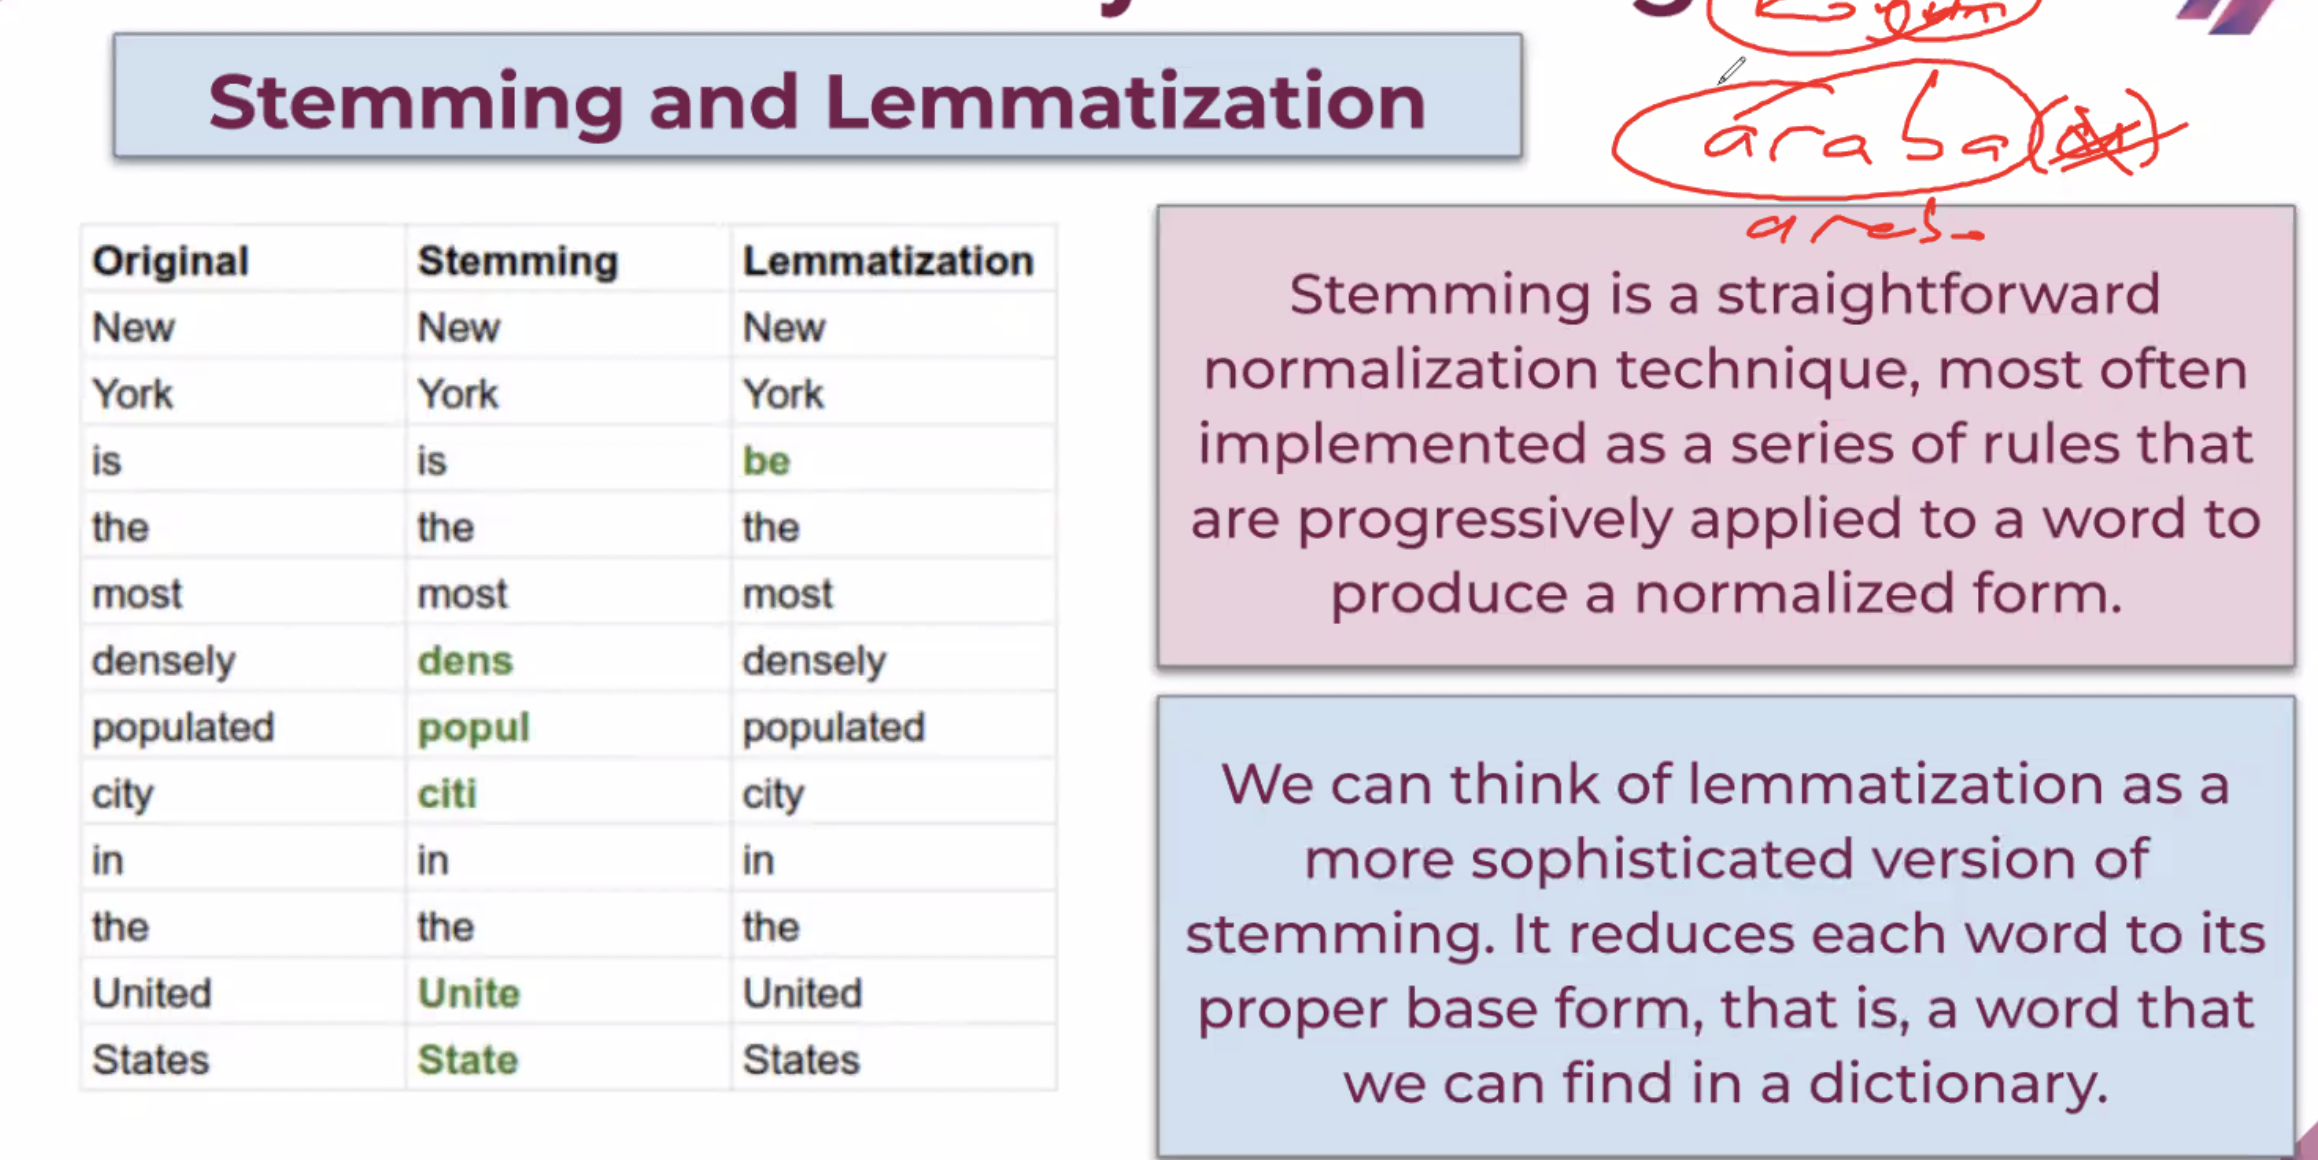

**NLP Theory Vectorization**
- **CountVectorizer (sunique tokenlerim featurelarim oluyor, bu tokenler hakkinda insight sagliyor)**
--> CountVectorizer once sayisi fazla olanlara yogunlasir
--> document uzerinde hangi tokenin daha onemli oldugunu anlayabiliriz
--> corpus icinde token onemini anlamamiza yardimci olmaz, insight saglamaz

------
- **tf-idf vectors (tokenlerimi/textimi sayisal hale donusturmek icin kullandigim algoritma)**
--> Hem document hem corpus icinde token onemini gosteriyor
--> TF: term-frequency (o yorumda tokenin onemi- yorum kac tokenden olusuyor, kac sefer kullaniliyor
--> ornek: ahmet telefonu begendi tf= 1/3 olur

------
- **IDF: inverse document frequency  (tokenin corpus icindeki onemi)**
--> ornek: corpusta 100 adet yorum var. "Telefon" tokeni kac yorumda geciyor Document-frequency = 4 yorumda geciyor (kac sefer kullanildiginin onemi yok)  **4/100**
--> IDF: degerin pozitif olmasi icin **log(100/4) * 100**
--> log almadan kullanirsak model cok yuksek degerler alabilir ve featurelara haddinden fazla agirlik verebilir. 


In [1]:
print("log(4/100) :", np.log(4/100) )
print("log(100/4) :", np.log(100/4) )

<IPython.core.display.Javascript object>

log(4/100) : -3.2188758248682006


<IPython.core.display.Javascript object>

log(100/4) : 3.2188758248682006


Example: Consider a document containing 100 words wherein the word cat appears 3 times. 
- The term frequency **tf** for cat is then (3 / 100) = 0.03. 
- Now, assume we have 10 million documents and the word cat appears in one thousand of these. 
- Then, the inverse document frequency **idf** is calculated as log(10,000,000 / 1,000) = 4.
- Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

lms: Consider a document containing 100 words wherein the word dog appears 5 times. 
- What is the TF-IDF weight of the word "dog" if the corpus has 10 million documents and the dog appears 10.000 of these?
- **tf** : 5/100 = 0.05
- **idf** : log((10,000,000/10,000)) = 3
- **tf-idf**: 0.05 * 3 = 0.15 

In [66]:
np.log10(10000000/10000)

3.0

------
- **word embedding**

# Data Cleaning and Vectorization For NLP

## Install and Import

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [3]:
# pip install nltk

## Text cleaning

In [4]:
import nltk

In [5]:
nltk.download('punkt' ) 

[nltk_data] Downloading package punkt to /Users/bzb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
sample_text= "Oh man, this is pretty cool. We will do more such things. 2 ½ %"

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
# sent_tokenize: cumlelere gore ayir, noktalari gordugu yerden ayirir
# word_tokenize: bosluklardan itibaren ayirir

### Step 1 - Convert to lower case

In [8]:
sentence_token = sent_tokenize(sample_text.lower())

sentence_token

['oh man, this is pretty cool.', 'we will do more such things.', '2 ½ %']

### Step 2 - Tokenization

In [9]:
# breaking sentences into words 
word_token = word_tokenize(sample_text.lower())
word_token 

['oh',
 'man',
 ',',
 'this',
 'is',
 'pretty',
 'cool',
 '.',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things',
 '.',
 '2',
 '½',
 '%']

### Step 3 - Removing Punctuation and Numbers

In [10]:
tokens_without_punc = [w for w in word_token if w.isalpha()] # .isalnum() for number and object
tokens_without_punc
# token string-object mi kontrol eder, 
# 

['oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things']

-----

-----
-----

In [11]:
import string

In [12]:
raw_docs = [
    "first a SENTENCE. The sample  ", "second £$ and in sentence unwanted trial",
    "3.sentence for a sample"
]
import nltk

raw_docs = [doc.lower() for doc in raw_docs]
print("step 1: raw_docs -->", raw_docs)
print("---------")
from nltk.tokenize import word_tokenize

tokenized_docs = [word_tokenize(doc) for doc in raw_docs]
print("step 2: tokenized_words-->", tokenized_docs)
print("---------")
from nltk.tokenize import sent_tokenize

sent_token = [sent_tokenize(doc) for doc in raw_docs]
print("step 2: sent_token (keep as a sentence -->", sent_token)

step 1: raw_docs --> ['first a sentence. the sample  ', 'second £$ and in sentence unwanted trial', '3.sentence for a sample']
---------
step 2: tokenized_words--> [['first', 'a', 'sentence', '.', 'the', 'sample'], ['second', '£', '$', 'and', 'in', 'sentence', 'unwanted', 'trial'], ['3.sentence', 'for', 'a', 'sample']]
---------
step 2: sent_token (keep as a sentence --> [['first a sentence.', 'the sample'], ['second £$ and in sentence unwanted trial'], ['3.sentence for a sample']]


In [13]:
# # step 3 
# import re
# regex = re.compile('[%s]' % re.escape(string.punctuation))

# tokenized_doc_no_punctuation = []

# for review in tokenized_docs:
#     new_review = [] 
#     for token in review:
#         new_token = regex.sub(u'', token)
#         if not new_token == u'':
#             new_review.append(new_review)

#     tokenized_doc_no_punctuation.append(new_review)

# print(tokenized_doc_no_punctuation)

## ??????????

### Step 4 - Removing Stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bzb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords

In [16]:
stop_words = stopwords.words("english") # kullanici dili yazilir
stop_words
# stop_word tokenleri gosterir

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
tokens_without_punc

['oh',
 'man',
 'this',
 'is',
 'pretty',
 'cool',
 'we',
 'will',
 'do',
 'more',
 'such',
 'things']

In [18]:
token_without_sw = [t for t in tokens_without_punc if t not in stop_words]  
# if you don't make a sentiment analysis , (customers feeling.   social media etc.)
# you can remove negative auxiliary verb

token_without_sw
# stop_wordler icinde olmayanlari al

['oh', 'man', 'pretty', 'cool', 'things']

### Step 5 - Stemming & Lemmatization

### Data Normalization-Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer
#

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/bzb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
WordNetLemmatizer().lemmatize("driving", pos="n") # default pos=V, fiil olarak anlamsal kokenlerine indirir
# verb nadir kullanilir, noun daha genel kullanim oldugu icin "pos=n"  

# surucu ve surme anlami vat 
# model sozlukte farkli anlami oldugunu gorunce kelimeyi oldugu gibi tuttu

'driving'

In [22]:
lem = [WordNetLemmatizer().lemmatize(t) for t in token_without_sw]

In [23]:
lem

['oh', 'man', 'pretty', 'cool', 'thing']

### Data Normalization-Stemming

In [24]:
from nltk.stem import PorterStemmer

In [25]:
PorterStemmer().stem("driving")
# farkli anlami olup olmadigina bakmadan kokenini alir 

'drive'

In [26]:
stem = [PorterStemmer().stem(t) for t in token_without_sw]

In [27]:
stem

['oh', 'man', 'pretti', 'cool', 'thing']

----
----
- system will do it itself
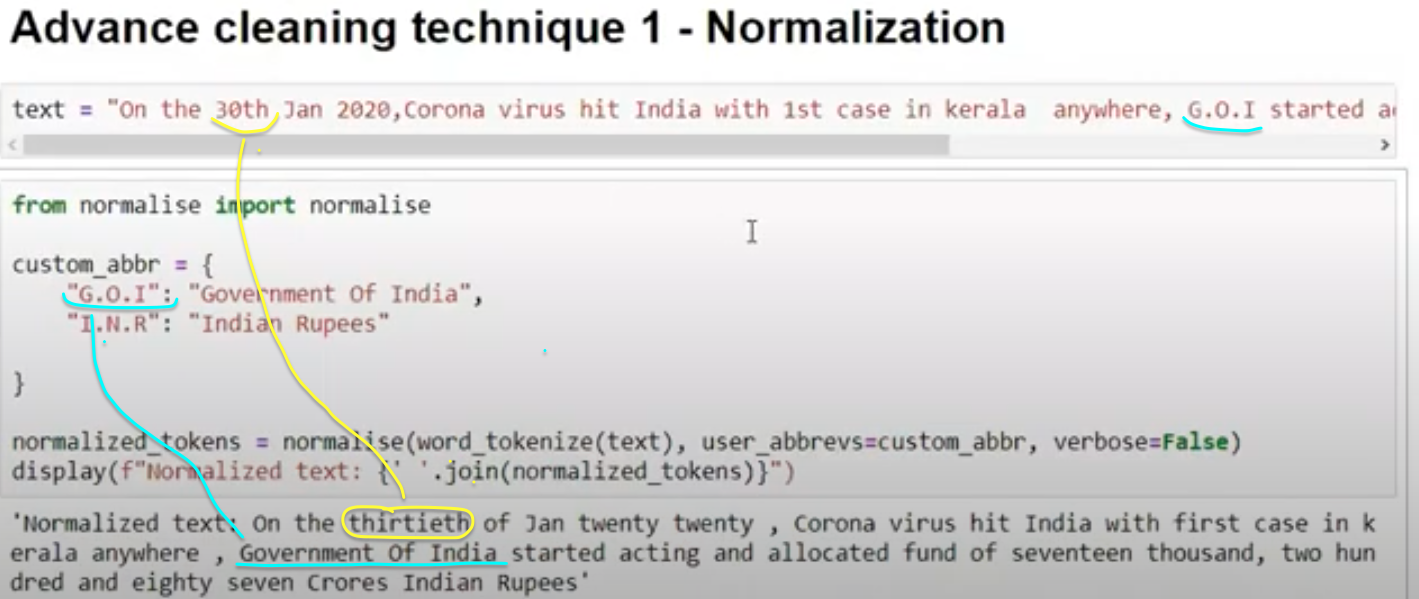

---




## Joining

In [28]:
" ".join(lem)

'oh man pretty cool thing'

## Cleaning Function - for classification (NOT for sentiment analysis)

In [29]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [30]:
pd.Series(sample_text).apply(cleaning)

0    oh man pretty cool thing
dtype: object

## Cleaning Function - for sentiment analysis

**Sentiment Analysis** digerlerinden farki, olumsuz yardimci fiilleri **cikartmadan** analiz etmek

--- 


In [31]:
sample_text = "Oh man, this is pretty cool. We will do more such things. don't aren't are not. no problem"

In [32]:
s = sample_text.replace("'",'') # bosluk degil, sadece ust imleci ortadan kaldiriyoruz
# don't yazan yerde dont yazacagi icin text icinde tutmaya devam edecegiz 

word = word_tokenize(s)
word 

['Oh',
 'man',
 ',',
 'this',
 'is',
 'pretty',
 'cool',
 '.',
 'We',
 'will',
 'do',
 'more',
 'such',
 'things',
 '.',
 'dont',
 'arent',
 'are',
 'not',
 '.',
 'no',
 'problem']

In [33]:
## fonksiyonu 2 sefer calistirirsak hata alabiliriz, 
# cunku ilk calistirmada ilk for dongusundeki not-no kelimelerini cikarttigi icin 2. calistirmada bu kelimeleri bulamaz
# value error verebilir 

for i in ["not", "no"]:
        stop_words.remove(i)
# don't yerine do not seklinde yazilma ihtimaline kardi, 
# bu olumsuz textleri stop_wordslerin icinden cikartiyoruz


def cleaning_fsa(data):
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'') # don't can't gibi olumsuzlari tutmak icin kesme isaretini kaldirdik
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [34]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
pd.Series(sample_text).apply(cleaning_fsa)

0    oh man pretty cool thing dont arent not no pro...
dtype: object

## CountVectorization and TF-IDF Vectorization

In [36]:
df = pd.read_csv("airline_tweets.csv")

In [37]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [38]:
df = df[['airline_sentiment','text']]
df

airline_sentiment                                               text
0               neutral                @VirginAmerica What @dhepburn said.
1              positive  @VirginAmerica plus you've added commercials t...
2               neutral  @VirginAmerica I didn't today... Must mean I n...
3              negative  @VirginAmerica it's really aggressive to blast...
4              negative  @VirginAmerica and it's a really big bad thing...
...                 ...                                                ...
14635          positive  @AmericanAir thank you we got on a different f...
14636          negative  @AmericanAir leaving over 20 minutes Late Flig...
14637           neutral  @AmericanAir Please bring American Airlines to...
14638          negative  @AmericanAir you have my money, you change my ...
14639           neutral  @AmericanAir we have 8 ppl so we need 2 know h...

[14640 rows x 2 columns]

In [39]:
df = df.head(8)
df
# vectorization islemleri icin sample

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...
5          negative  @VirginAmerica seriously would pay $30 a fligh...
6          positive  @VirginAmerica yes, nearly every time I fly VX...
7           neutral  @VirginAmerica Really missed a prime opportuni...

In [40]:
df2 = df.copy()

In [41]:
df2["text"] = df2["text"].apply(cleaning_fsa)

In [42]:
df2

airline_sentiment                                               text
0           neutral                        virginamerica dhepburn said
1          positive  virginamerica plus youve added commercial expe...
2           neutral  virginamerica didnt today must mean need take ...
3          negative  virginamerica really aggressive blast obnoxiou...
4          negative                 virginamerica really big bad thing
5          negative  virginamerica seriously would pay flight seat ...
6          positive  virginamerica yes nearly every time fly vx ear...
7           neutral  virginamerica really missed prime opportunity ...

## CountVectorization

In [43]:
X = df2["text"]
y = df2["airline_sentiment"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5, # train ve test esit olmasi icin simdilik boyle aldik
                                                    stratify=y,
                                                    random_state=42)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train) # train'e fit_transform (fit=ogrenme)
# fit: butun unique wordleri bulup feature olarak yaziyor
# transform: unique kelimeler(featurelar) kacar tane var sayiyor

X_test_count = vectorizer.transform(X_test) #test'e transform
# train icinde like geciyor, test icinde yok
# testte gecip trainde gecmeyen token varsa("like") ignore edilir, model "like" goremedigi icin tahmin edemez
# ML cogunluga gore tahmin eder, 

# egitilecek data cok cok buyuk olmali ve train icin cok data kullanilmali

In [48]:
vectorizer.get_feature_names_out()

# bazi surumlerde hata veriyorsa "_out" kaldirarak denemek gerekebilir

array(['another', 'away', 'bad', 'big', 'dhepburn', 'didnt', 'ear',
       'every', 'fly', 'go', 'mean', 'must', 'nearly', 'need', 'really',
       'said', 'take', 'thing', 'time', 'today', 'trip', 'virginamerica',
       'vx', 'worm', 'yes'], dtype=object)

In [49]:
X_train_count.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0]])

In [50]:
df_train_count = pd.DataFrame(X_train_count.toarray(),
                              columns=vectorizer.get_feature_names_out())
df_train_count
# egitim datasinin olabildigince buyuk olmasi lazim 

another  away  bad  big  dhepburn  didnt  ear  every  fly  go  mean  must  \
0        0     1    0    0         0      0    1      1    1   1     0     0   
1        0     0    0    0         1      0    0      0    0   0     0     0   
2        1     0    0    0         0      1    0      0    0   0     1     1   
3        0     0    1    1         0      0    0      0    0   0     0     0   

   nearly  need  really  said  take  thing  time  today  trip  virginamerica  \
0       1     0       0     0     0      0     1      0     0              1   
1       0     0       0     1     0      0     0      0     0              1   
2       0     1       0     0     1      0     0      1     1              1   
3       0     0       1     0     0      1     0      0     0              1   

   vx  worm  yes  
0   1     1    1  
1   0     0    0  
2   0     0    0  
3   0     0    0

In [51]:
X_train

6    virginamerica yes nearly every time fly vx ear...
0                          virginamerica dhepburn said
2    virginamerica didnt today must mean need take ...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [52]:
X_train[6]


'virginamerica yes nearly every time fly vx ear worm go away'

In [53]:
df_test_count = pd.DataFrame(X_test_count.toarray(),
                             columns=vectorizer.get_feature_names_out())
df_test_count


another  away  bad  big  dhepburn  didnt  ear  every  fly  go  mean  must  \
0        0     0    0    0         0      0    0      0    0   0     0     0   
1        0     0    1    0         0      1    0      0    0   0     0     0   
2        0     0    0    0         0      0    0      0    0   0     0     0   
3        0     0    0    0         0      0    0      0    0   0     0     0   

   nearly  need  really  said  take  thing  time  today  trip  virginamerica  \
0       0     0       1     0     0      0     0      0     0              1   
1       0     0       1     0     0      1     0      0     0              1   
2       0     0       0     0     0      0     0      0     0              1   
3       0     0       1     0     0      0     0      0     0              1   

   vx  worm  yes  
0   0     0    0  
1   0     0    0  
2   0     0    0  
3   0     0    0

In [54]:
X_test

3    virginamerica really aggressive blast obnoxiou...
5    virginamerica seriously would pay flight seat ...
1    virginamerica plus youve added commercial expe...
7    virginamerica really missed prime opportunity ...
Name: text, dtype: object

In [55]:
X_test[3]

'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'

In [56]:
vectorizer.vocabulary_

{'virginamerica': 21,
 'yes': 24,
 'nearly': 12,
 'every': 7,
 'time': 18,
 'fly': 8,
 'vx': 22,
 'ear': 6,
 'worm': 23,
 'go': 9,
 'away': 1,
 'dhepburn': 4,
 'said': 15,
 'didnt': 5,
 'today': 19,
 'must': 11,
 'mean': 10,
 'need': 13,
 'take': 16,
 'another': 0,
 'trip': 20,
 'really': 14,
 'big': 3,
 'bad': 2,
 'thing': 17}

## TF-IDF

sklearn TD-IDF
https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d
- *token hic gecmiyorsa 100/0 tanimsizolacagi icin +1 eklenmesi gibi bir durum var*
- TF: her satirsa kac unique var, tokenlerin cumlede gecme sikligi
- id: kac satirda bu unique token geciyor

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tf_idf_vectorizer = TfidfVectorizer()
# kac unique var
# kac token 
# her unique kac satirda geciyor 

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [59]:
tf_idf_vectorizer.get_feature_names_out()


array(['another', 'away', 'bad', 'big', 'dhepburn', 'didnt', 'ear',
       'every', 'fly', 'go', 'mean', 'must', 'nearly', 'need', 'really',
       'said', 'take', 'thing', 'time', 'today', 'trip', 'virginamerica',
       'vx', 'worm', 'yes'], dtype=object)

In [60]:
X_train_tf_idf.toarray()

array([[0.        , 0.31200802, 0.        , 0.        , 0.        ,
        0.        , 0.31200802, 0.31200802, 0.31200802, 0.31200802,
        0.        , 0.        , 0.31200802, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31200802, 0.        ,
        0.        , 0.16281873, 0.31200802, 0.31200802, 0.31200802],
       [0.        , 0.        , 0.        , 0.        , 0.66338461,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.66338461, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.34618161, 0.        , 0.        , 0.        ],
       [0.34768534, 0.        , 0.        , 0.        , 0.        ,
        0.34768534, 0.        , 0.        , 0.        , 0.        ,
        0.34768534, 0.34768534, 0.        , 0.34768534, 0.        ,
        0.        , 0.34768534, 0.        , 0.        , 0.34768534,
        0.34768534, 0.18143663, 0.        , 0.

In [61]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(),
                              columns = tf_idf_vectorizer.get_feature_names_out())
df_train_tfidf
# tum tokenler 1 sefer gectigi icin degerler hemen hemen ayni
# virginamerica her satirda var, onemli olmadigini dusundugu icin agirlik katdayisi daha az 


another      away       bad       big  dhepburn     didnt       ear  \
0  0.000000  0.312008  0.000000  0.000000  0.000000  0.000000  0.312008   
1  0.000000  0.000000  0.000000  0.000000  0.663385  0.000000  0.000000   
2  0.347685  0.000000  0.000000  0.000000  0.000000  0.347685  0.000000   
3  0.000000  0.000000  0.483803  0.483803  0.000000  0.000000  0.000000   

      every       fly        go      mean      must    nearly      need  \
0  0.312008  0.312008  0.312008  0.000000  0.000000  0.312008  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.347685  0.347685  0.000000  0.347685   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     really      said      take     thing      time     today      trip  \
0  0.000000  0.000000  0.000000  0.000000  0.312008  0.000000  0.000000   
1  0.000000  0.663385  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.347685  0.000000  0.000000  0.347685  0.347685   
3  0.483803  0.000000  0.000000  0.483803  0.000000  0.000000  0.000000   

   virginamerica        vx      worm       yes  
0       0.162819  0.312008  0.312008  0.312008  
1       0.346182  0.000000  0.000000  0.000000  
2       0.181437  0.000000  0.000000  0.000000  
3       0.252468  0.000000  0.000000  0.000000

In [62]:
X_train[6]

'virginamerica yes nearly every time fly vx ear worm go away'

In [67]:
df_train_tfidf.loc[0].sort_values(ascending=False) 

nearly           0.312008
fly              0.312008
worm             0.312008
vx               0.312008
time             0.312008
away             0.312008
go               0.312008
yes              0.312008
every            0.312008
ear              0.312008
virginamerica    0.162819
thing            0.000000
bad              0.000000
big              0.000000
trip             0.000000
today            0.000000
dhepburn         0.000000
take             0.000000
said             0.000000
really           0.000000
need             0.000000
didnt            0.000000
must             0.000000
mean             0.000000
another          0.000000
Name: 0, dtype: float64

In [68]:
df_train_tfidf.loc[1].sort_values(ascending=False) 
# her satirda gecen virginamerica  en dusuk agirliga sahip

dhepburn         0.663385
said             0.663385
virginamerica    0.346182
another          0.000000
need             0.000000
worm             0.000000
vx               0.000000
trip             0.000000
today            0.000000
time             0.000000
thing            0.000000
take             0.000000
really           0.000000
nearly           0.000000
away             0.000000
must             0.000000
mean             0.000000
go               0.000000
fly              0.000000
every            0.000000
ear              0.000000
didnt            0.000000
big              0.000000
bad              0.000000
yes              0.000000
Name: 1, dtype: float64

In [ ]:
# olumlu/olumsuz yorumlarda hangi tokenler geciyor, onlara yuksek agirlik verir 
# 

In [64]:
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(),
                             columns=tf_idf_vectorizer.get_feature_names())
df_test_tfidf

another  away       bad  big  dhepburn     didnt  ear  every  fly   go  \
0      0.0   0.0  0.000000  0.0       0.0  0.000000  0.0    0.0  0.0  0.0   
1      0.0   0.0  0.483803  0.0       0.0  0.483803  0.0    0.0  0.0  0.0   
2      0.0   0.0  0.000000  0.0       0.0  0.000000  0.0    0.0  0.0  0.0   
3      0.0   0.0  0.000000  0.0       0.0  0.000000  0.0    0.0  0.0  0.0   

   mean  must  nearly  need    really  said  take     thing  time  today  \
0   0.0   0.0     0.0   0.0  0.886548   0.0   0.0  0.000000   0.0    0.0   
1   0.0   0.0     0.0   0.0  0.483803   0.0   0.0  0.483803   0.0    0.0   
2   0.0   0.0     0.0   0.0  0.000000   0.0   0.0  0.000000   0.0    0.0   
3   0.0   0.0     0.0   0.0  0.886548   0.0   0.0  0.000000   0.0    0.0   

   trip  virginamerica   vx  worm  yes  
0   0.0       0.462637  0.0   0.0  0.0  
1   0.0       0.252468  0.0   0.0  0.0  
2   0.0       1.000000  0.0   0.0  0.0  
3   0.0       0.462637  0.0   0.0  0.0

In [65]:
X_test[3]

'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'